<a href="https://colab.research.google.com/github/Pratikshya49/Concepts-and-Technologies-of-AI/blob/main/Workshop7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**Part 1: Regression Task**


Task 1: Load and Split Dataset

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)


Training samples: (353, 10)
Test samples: (89, 10)


Task 2 - Step 1: Baseline Model

In [3]:
# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression")
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)


#Coefficient
print("Linear Regression Coefficients:")
print(lr.coef_)

Baseline Linear Regression
Training MSE: 2868.549702835577
Test MSE: 2900.193628493482
Linear Regression Coefficients:
[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


Step - 2: Hyperparameter Tuning

Ridge Regression (L2):



In [4]:
ridge = Ridge()

alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(
    ridge, alpha_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_

print("Best Ridge Alpha:", ridge_cv.best_params_)

# Evaluate Ridge
ridge_train_mse = mean_squared_error(y_train, best_ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test))

print("Ridge Training MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)

Best Ridge Alpha: {'alpha': 0.1}
Ridge Training MSE: 2912.983541587901
Ridge Test MSE: 2856.4868876706537


Lasso Regression (L1):

In [5]:
lasso = Lasso(max_iter=10000)

lasso_cv = GridSearchCV(
    lasso, alpha_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

lasso_cv.fit(X_train, y_train)

best_lasso = lasso_cv.best_estimator_

print("Best Lasso Alpha:", lasso_cv.best_params_)

# Evaluate Lasso
lasso_train_mse = mean_squared_error(y_train, best_lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, best_lasso.predict(X_test))

print("Lasso Training MSE:", lasso_train_mse)
print("Lasso Test MSE:", lasso_test_mse)

Best Lasso Alpha: {'alpha': 0.1}
Lasso Training MSE: 2935.25823259759
Lasso Test MSE: 2798.193485169719


Step - 3: Regularization Comparison

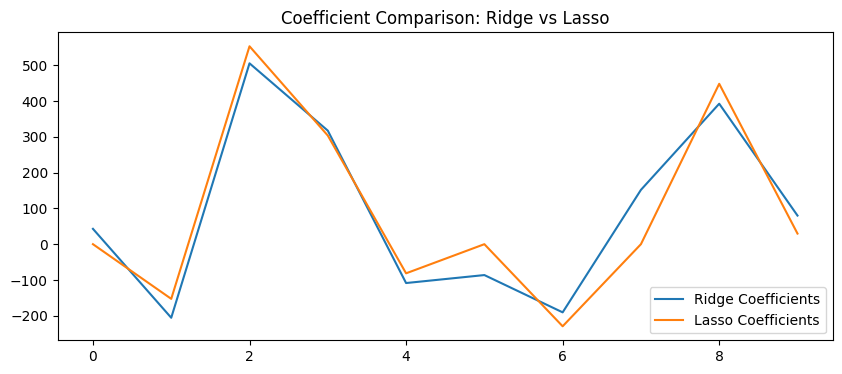

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(best_ridge.coef_, label='Ridge Coefficients')
plt.plot(best_lasso.coef_, label='Lasso Coefficients')
plt.legend()
plt.title("Coefficient Comparison: Ridge vs Lasso")
plt.show()

**Part 2: Classification task**


Task - 1: Load ans Split dataset

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Task 2 - Step 1: Baseline Regression

In [8]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Baseline Logistic Regression")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

#Coefficient
print("Logistic Regression Coefficients:")
print(log_reg.coef_)

Baseline Logistic Regression
Training Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193
Logistic Regression Coefficients:
[[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]


Step - 2: Hyperparameter Tuning

In [10]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

log_cv = GridSearchCV(
    LogisticRegression(
        max_iter=10000,
        solver='liblinear'
    ),
    param_grid,
    cv=5,
    scoring='accuracy'
)

log_cv.fit(X_train, y_train)

best_log = log_cv.best_estimator_

print("Best Parameters:", log_cv.best_params_)
print("Training Accuracy:", accuracy_score(y_train, best_log.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, best_log.predict(X_test)))

Best Parameters: {'C': 100, 'penalty': 'l1'}
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771


Step - 3: L1 vs L2 Logistic Regression

In [11]:
log_l1 = LogisticRegression(
    C=best_log.C, penalty='l1',
    solver='liblinear', max_iter=10000
)

log_l2 = LogisticRegression(
    C=best_log.C, penalty='l2',
    solver='liblinear', max_iter=10000
)

log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)

print("L1 Test Accuracy:", accuracy_score(y_test, log_l1.predict(X_test)))
print("L2 Test Accuracy:", accuracy_score(y_test, log_l2.predict(X_test)))

L1 Test Accuracy: 0.9824561403508771
L2 Test Accuracy: 0.956140350877193


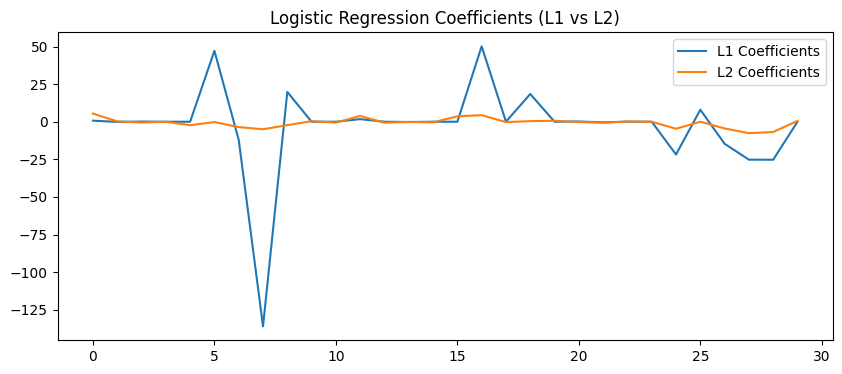

In [12]:
#Coefficient Visualization
plt.figure(figsize=(10, 4))
plt.plot(log_l1.coef_[0], label='L1 Coefficients')
plt.plot(log_l2.coef_[0], label='L2 Coefficients')
plt.legend()
plt.title("Logistic Regression Coefficients (L1 vs L2)")
plt.show()

L1 regularization produces sparse coefficients → feature selection.

L2 regularization distributes weight across all features.

Regularization reduces overfitting by controlling model complexity.

Too strong regularization increases bias and lowers accuracy.